<a href="https://colab.research.google.com/github/toby766/Spam-classification/blob/main/spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
df.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)


In [3]:
# Split the data into features (X) and labels (y)
X = np.array(df['message'])
y = np.array(df['label'])
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# find the number of missing values in each column
null_counts = df.isnull().sum()

# print the number of missing values for each column
print(null_counts)

label      0
message    0
dtype: int64


ham     4825
spam     747
Name: label, dtype: int64


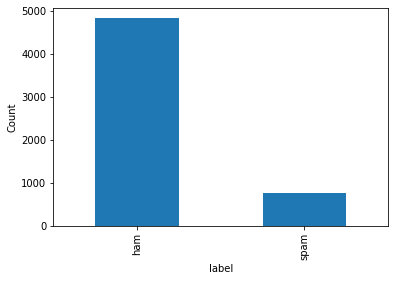

In [5]:
# Count the number of messages for each label
label_counts = df['label'].value_counts()
print(label_counts)
# Plot the distribution of labels
label_counts.plot(kind='bar')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()


label
ham      71.023627
spam    138.866131
Name: message, dtype: float64


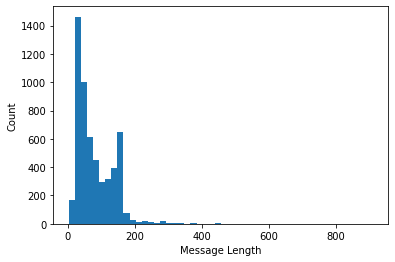

In [6]:
# Calculate the average length of messages for each label
msg_lengths = df['message'].apply(len)
avg_lengths = df.groupby('label')['message'].apply(lambda x: x.str.len().mean())
print(avg_lengths)

# Plot the distribution of message lengths
plt.hist(msg_lengths, bins=50)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


In [7]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vectors = vectorizer.transform(X_test)


In [8]:
# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train_vectors, y_train)


MultinomialNB()

In [9]:
# Make predictions on the test data
predictions = clf.predict(X_test_vectors)

# Calculate the accuracy of the model
accuracy = (predictions == y_test).mean()
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.9838565022421525


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


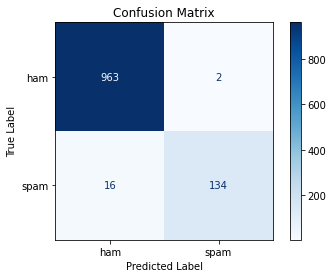

In [10]:
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(clf, X_test_vectors, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
sample = input('Enter a message:')
data = vectorizer.transform([sample]).toarray()
print(clf.predict(data))



Enter a message:You won $100000 prize. ClIck here
['spam']
